In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [50]:
image1 = cv2.imread("faces/img01.jpg")
cv2.imshow("FACE", image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
face_images = [] # 빈리스트
face_images.clear()
for i in range(15):
    file = "./faces/img{0:02d}.jpg".format(i + 1)
    image = cv2.imread(file)
    image = cv2.resize(image, (64, 64)) # 64 X 64 RGB -> BGR
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR -> RGB
    face_images.append(image)

In [52]:
print(face_images[14])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [253 253 253]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [253 253 253]
  [254 254 254]
  ...
  [247 247 247]
  [255 255 255]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [246 246 246]
  ...
  [238 238 238]
  [252 252 252]
  [254 254 254]]]


In [53]:
def show_image(row, col, images):
    (_, ax) = plt.subplots(row, col, figsize=(row, col))
    for i in range(row):
        for j in range(col):
            if row <= 1:
                axis = ax[j]
            else:
                axis = ax[i, j]
                axis.get_xaxis().set_visible(False)
                axis.get_yaxis().set_visible(False)
                axis.imshow(images[i * col + j])
    plt.show()

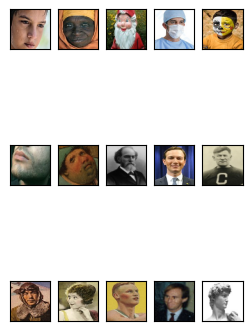

In [54]:
show_image(3, 5, face_images)

In [55]:
animal_images = [] #
animal_images.clear()
for i in range(15):
    file = "./animals/img{0:02d}.jpg".format(i + 1)
    image = cv2.imread(file)
    image = cv2.resize(image, (64, 64)) # 64 X 64 RGB -> BGR
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR -> RGB
    animal_images.append(image)

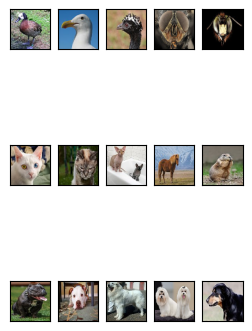

In [56]:
show_image(3, 5, animal_images)

In [57]:
# 레이블 만들기
y = [(1, 0)] * len(face_images) + [(0, 1)] * len(animal_images)

In [58]:
print(y)

[(1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]


In [59]:
y = np.array(y) # 넘파일 배열
y = y.astype(np.int32)
print(y)

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [60]:
# Train Data
X = face_images + animal_images # 리스트
print(X)
print(len(X))

[array([[[  7,   8,  10],
        [  5,   7,   6],
        [ 14,  14,  14],
        ...,
        [212, 231, 235],
        [215, 235, 236],
        [214, 234, 233]],

       [[ 10,  11,  13],
        [  7,   8,   9],
        [ 12,  12,  12],
        ...,
        [206, 225, 229],
        [202, 222, 223],
        [208, 228, 227]],

       [[ 12,  13,  15],
        [  9,   9,  11],
        [ 10,  10,  11],
        ...,
        [206, 225, 227],
        [209, 229, 229],
        [212, 232, 230]],

       ...,

       [[103,  66,  48],
        [110,  73,  55],
        [111,  74,  55],
        ...,
        [215, 231, 231],
        [217, 233, 233],
        [217, 232, 235]],

       [[ 99,  62,  45],
        [110,  74,  56],
        [115,  78,  59],
        ...,
        [216, 232, 232],
        [217, 233, 234],
        [217, 232, 235]],

       [[ 97,  61,  45],
        [105,  70,  51],
        [108,  71,  53],
        ...,
        [217, 233, 233],
        [217, 232, 235],
        [216, 231, 234]

In [61]:
X_train = np.array(X) # 넘파이 배열
X_train = X_train / 255.0 # 정규화
X_train = X_train.astype(np.float32)
print(X_train)

[[[[0.02745098 0.03137255 0.03921569]
   [0.01960784 0.02745098 0.02352941]
   [0.05490196 0.05490196 0.05490196]
   ...
   [0.83137256 0.90588236 0.92156863]
   [0.84313726 0.92156863 0.9254902 ]
   [0.8392157  0.91764706 0.9137255 ]]

  [[0.03921569 0.04313726 0.05098039]
   [0.02745098 0.03137255 0.03529412]
   [0.04705882 0.04705882 0.04705882]
   ...
   [0.80784315 0.88235295 0.8980392 ]
   [0.7921569  0.87058824 0.8745098 ]
   [0.8156863  0.89411765 0.8901961 ]]

  [[0.04705882 0.05098039 0.05882353]
   [0.03529412 0.03529412 0.04313726]
   [0.03921569 0.03921569 0.04313726]
   ...
   [0.80784315 0.88235295 0.8901961 ]
   [0.81960785 0.8980392  0.8980392 ]
   [0.83137256 0.9098039  0.9019608 ]]

  ...

  [[0.40392157 0.25882354 0.1882353 ]
   [0.43137255 0.28627452 0.21568628]
   [0.43529412 0.2901961  0.21568628]
   ...
   [0.84313726 0.90588236 0.90588236]
   [0.8509804  0.9137255  0.9137255 ]
   [0.8509804  0.9098039  0.92156863]]

  [[0.3882353  0.24313726 0.1764706 ]
   [0.4

In [62]:
print(X_train.shape)
print(y.shape)

(30, 64, 64, 3)
(30, 2)


In [63]:
# 학습할 모델 만들기
model = keras.Sequential(name="FACE_DETECTOR")
model.add(keras.layers.Input(shape=(64, 64, 3)))
# Convolution : Correlation
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# DNN
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))

In [64]:
model.summary()

Model: "FACE_DETECTOR"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,122 (520.01 KB)

 Trainable params: 133,122 (520.01 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [66]:
history = model.fit(X_train, y, epochs=50)
# model.save("FACE_DETECTOR.keras")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - categorical_accuracy: 0.4667 - loss: 0.6970
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.7000 - loss: 0.6825
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.5000 - loss: 0.6726
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.9000 - loss: 0.6567
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.9667 - loss: 0.6336
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.8667 - loss: 0.6033
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.8667 - loss: 0.5667
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.8000 - loss: 0.5304
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.7667 - loss: 0.5228
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.7000 - loss: 0.5122
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

In [67]:
print(f'모델정확도 : {model.evaluate(X_train, y)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - categorical_accuracy: 1.0000 - loss: 0.0013
모델정확도 : [0.0013302783481776714, 1.0]


In [68]:
test_images = []
test_images.clear()
for i in range(10): # 테스트 이미지 10개
    file = "./test_images/img{0:02d}.jpg".format(i + 1)
    image = cv2.imread(file)
    image = cv2.resize(image, (64, 64)) # 64 X 64 RGB -> BGR
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR -> RGB
    test_images.append(image)

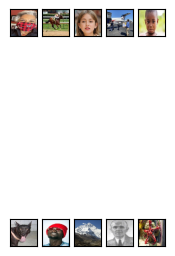

In [69]:
show_image(2, 5, test_images)
test_images = np.array(test_images) / 255.0
test_images = test_images.astype('float32')
# test_images = np.array(test_images)

In [71]:
cnn_model = keras.models.load_model("FACE_DETECTOR.keras")
cnn_model.predict(test_images)
# predict = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[9.9994922e-01, 5.0757510e-05],
       [2.6664053e-04, 9.9973339e-01],
       [9.9849534e-01, 1.5046614e-03],
       [4.9696403e-08, 1.0000000e+00],
       [9.9999309e-01, 6.9416110e-06],
       [4.8536249e-02, 9.5146376e-01],
       [9.9996614e-01, 3.3831846e-05],
       [4.7960956e-08, 1.0000000e+00],
       [8.2115656e-01, 1.7884344e-01],
       [9.2165309e-01, 7.8346938e-02]], dtype=float32)

In [74]:
print(cnn_model.predict(test_images))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[9.9994922e-01 5.0757510e-05]
 [2.6664053e-04 9.9973339e-01]
 [9.9849534e-01 1.5046614e-03]
 [4.9696403e-08 1.0000000e+00]
 [9.9999309e-01 6.9416110e-06]
 [4.8536249e-02 9.5146376e-01]
 [9.9996614e-01 3.3831846e-05]
 [4.7960956e-08 1.0000000e+00]
 [8.2115656e-01 1.7884344e-01]
 [9.2165309e-01 7.8346938e-02]]


In [ ]:
pred = cnn_model.predict(test_images)  # 먼저 predict() 호출
print(pred.round(3))                    # 결과 배열에 round() 적용


AttributeError: 'Sequential' object has no attribute 'pred'